It involves below steps:

1.Getting the dataset,2. Importing libraries.3. Importing datasets.4. Finding Missing Data.5. Encoding Categorical Data. 6. Splitting dataset into training and test set. 7. Feature scaling

In [46]:
import numpy as np

Numpy Python library is used for including any type of mathematical operation in the code. It is the fundamental package for scientific calculation in Python. It also supports to add large, multidimensional arrays and matrices.

In [47]:
import matplotlib.pyplot as plt

matplotlib is a python two dimensional ploting library and we are importing sub library pyplot.

In [48]:
import pandas as pd

pandas is used to import and manage dataset.

In [49]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# Importing the dataset

dataset = pd.read_csv('/content/drive/My Drive/Data.csv')
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [51]:
# Print Total number of Rows & columns in dataset
# Shape is an attribute

print(dataset.shape)

(10, 4)


In [52]:
# Print Information about data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [53]:
# Print Information Datatypes

datatypes = dataset.dtypes
print(datatypes)

Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object


In [54]:
# Count total number of classes in Data

class_counts = dataset.groupby('Purchased').size()
print(class_counts)

Purchased
No     5
Yes    5
dtype: int64


In [55]:
class_counts = dataset.groupby('Country').size()
print(class_counts)

Country
France     4
Germany    3
Spain      3
dtype: int64


In [56]:
dataset.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


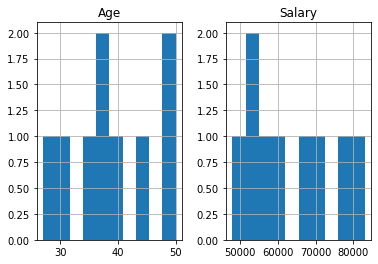

In [57]:
from matplotlib import pyplot
dataset.hist()
pyplot.show()

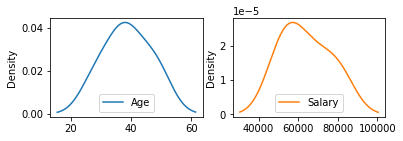

In [58]:
dataset.plot(kind='density' ,subplots=True, layout=(2,2), sharex=False)
pyplot.show()

In [59]:
X = dataset.iloc[:,0:3].values
y = dataset.iloc[:, 3].values

In [60]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [61]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [62]:
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [63]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NAN, strategy= 'constant', fill_value='20', verbose=1, copy=True)
imputer  = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])


In [64]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, '20'],
       ['France', 35.0, 58000.0],
       ['Spain', '20', 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [65]:
details = pd.DataFrame(X, columns = ['Country','Age','Salary'])
details.isnull().sum()

Country    0
Age        0
Salary     0
dtype: int64

In [66]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

In [67]:
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, '20'],
       [0, 35.0, 58000.0],
       [2, '20', 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [68]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder',OneHotEncoder(),[0])],remainder = 'passthrough')
X = columnTransformer.fit_transform(X)


In [69]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, '20'],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, '20', 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [70]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [71]:
X=X[:,1:]

In [72]:
print(X)

[[0.0 0.0 44.0 72000.0]
 [0.0 1.0 27.0 48000.0]
 [1.0 0.0 30.0 54000.0]
 [0.0 1.0 38.0 61000.0]
 [1.0 0.0 40.0 '20']
 [0.0 0.0 35.0 58000.0]
 [0.0 1.0 '20' 52000.0]
 [0.0 0.0 48.0 79000.0]
 [1.0 0.0 50.0 83000.0]
 [0.0 0.0 37.0 67000.0]]


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)


In [74]:
X_train

array([[0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 30.0, 54000.0],
       [0.0, 1.0, 27.0, 48000.0],
       [0.0, 0.0, 37.0, 67000.0],
       [0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, '20', 52000.0],
       [1.0, 0.0, 40.0, '20']], dtype=object)

In [75]:
X_test

array([[1.0, 0.0, 50.0, 83000.0],
       [0.0, 0.0, 35.0, 58000.0]], dtype=object)

In [76]:
y_train

array([0, 0, 1, 1, 1, 0, 0, 1])

In [77]:
y_test

array([0, 1])

In [78]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [79]:
X_train

array([[-0.57735027, -0.77459667,  0.98149546,  0.78748856],
       [ 1.73205081, -0.77459667, -0.6350853 , -0.00561784],
       [-0.57735027,  1.29099445, -0.98149546, -0.26998664],
       [-0.57735027, -0.77459667,  0.17320508,  0.56718123],
       [-0.57735027, -0.77459667,  1.44337567,  1.09591883],
       [-0.57735027,  1.29099445,  0.28867513,  0.30281243],
       [-0.57735027,  1.29099445, -1.78978583, -0.09374077],
       [ 1.73205081, -0.77459667,  0.51961524, -2.38405581]])

In [80]:
X_test

array([[ 1.73205081, -0.77459667,  1.67431578,  1.2721647 ],
       [-0.57735027, -0.77459667, -0.05773503,  0.17062803]])

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [82]:
X_train

array([[0.        , 0.        , 0.85714286, 0.91136997],
       [1.        , 0.        , 0.35714286, 0.68346417],
       [0.        , 1.        , 0.25      , 0.60749557],
       [0.        , 0.        , 0.60714286, 0.8480628 ],
       [0.        , 0.        , 1.        , 1.        ],
       [0.        , 1.        , 0.64285714, 0.7720942 ],
       [0.        , 1.        , 0.        , 0.6581413 ],
       [1.        , 0.        , 0.71428571, 0.        ]])

In [83]:
X_test

array([[1., 0., 1., 1.],
       [0., 0., 0., 0.]])